
### Polio Immunizations in South and Southeast Asia 

By Bryan Novy, June 17, 2016 dataframes_broker.wordpress.com 

At the dawn of the new millenium, the United Nations issued a set of  ambitious development projects in order to initiate more rapid and uniform development throughout the world. The Millenium Development Goals (MDGs) were to commence in the year 2000, and be acheived by 2015. That deadline has since expired, and we can analyize the projects in retrospect to see what they have achieved.

Item 6 of the MDGs is to "combat AIDS, malaria and other diseases" and Item 4 is to "reduce child mortality."

In the first entry of this series, we will look at the progress of child Polio immunizations in South and Southeast Asia.

Polio is a virus that attacks the nervous system. It can cause paralysis or death and mostly afflicts children. There is no cure. The only effective means of prevention is child vaccination. 

Most people can carry the virus without signs of illness, but can still spread it to other people in the mean time. Due to this, the World Health Organization considers even one case of Polio to be a sign of an epidemic.

Polio can paralyze and atrophy the legs, and result in more serious complications up to 40 years after infecion. 

It is for these reasons that the UN and WHO have sought to eradicate Polio.  

This analysis will look at three key questions:

What are the total, maximum, minimum, median and average numbers of Polio immunizations for children in South Asia in 2000? In 2014? Prior to the MDGs?
Which countries have the highest and the lowest Polio immunization coverage for children?
How does immunization in 2000 compare with immunization in 2014? Or prior to the MDGs?

### The Data

The data was taken from the World Health Organization's Global Health Observatory data repository, Polio ((Pol3), Data by country).

It consists of Country and Child Vaccination data from 35 years, between 1980 and 2014. 

To access this data: click the URL, then the Download tab. Select the 'quick downloads multipurpose table in CSV format' option to download the world Polio immunization data set.

Global Health Observatory data repository URL: http://apps.who.int/gho/data/node.main.A831?lang=en


### Processing the Data

For this project, the world Polio data will be reorganized, simplified and renamed. First, it will be broken down into two time periods, the MDG era and the pre MDG era. Then we will pull the data from the South and Southeast Asian regions and they will be put into one stand alone subset. The two eras will be compared, then they will be combined to get an understanding of how well polio immunization progressed over the two time periods. 

For a full break down of how this data was processed with Python, visit my *Github account*.

In [44]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
immunData = read_csv('Polio_immun.csv')

immunData.head()

,Unnamed: 0,Polio (Pol3) immunization coverage among 1-year-olds (%),Polio (Pol3) immunization coverage among 1-year-olds (%).1,Polio (Pol3) immunization coverage among 1-year-olds (%).2,Polio (Pol3) immunization coverage among 1-year-olds (%).3,Polio (Pol3) immunization coverage among 1-year-olds (%).4,Polio (Pol3) immunization coverage among 1-year-olds (%).5,Polio (Pol3) immunization coverage among 1-year-olds (%).6,Polio (Pol3) immunization coverage among 1-year-olds (%).7,Polio (Pol3) immunization coverage among 1-year-olds (%).8,...,Polio (Pol3) immunization coverage among 1-year-olds (%).25,Polio (Pol3) immunization coverage among 1-year-olds (%).26,Polio (Pol3) immunization coverage among 1-year-olds (%).27,Polio (Pol3) immunization coverage among 1-year-olds (%).28,Polio (Pol3) immunization coverage among 1-year-olds (%).29,Polio (Pol3) immunization coverage among 1-year-olds (%).30,Polio (Pol3) immunization coverage among 1-year-olds (%).31,Polio (Pol3) immunization coverage among 1-year-olds (%).32,Polio (Pol3) immunization coverage among 1-year-olds (%).33,Polio (Pol3) immunization coverage among 1-year-olds (%).34
0,Country,2014,2013,2012,2011,2010.0,2009.0,2008.0,2007.0,2006.0,...,1989.0,1988.0,1987.0,1986.0,1985.0,1984.0,1983.0,1982.0,1981.0,1980.0
1,Afghanistan,75,70,67,68,66.0,63.0,64.0,63.0,58.0,...,33.0,35.0,25.0,11.0,15.0,16.0,5.0,5.0,3.0,NaN
2,Albania,98,99,99,99,99.0,98.0,99.0,99.0,97.0,...,96.0,96.0,94.0,94.0,94.0,92.0,92.0,92.0,92.0,92.0
3,Algeria,95,95,95,95,95.0,94.0,92.0,95.0,95.0,...,87.0,85.0,79.0,72.0,69.0,30.0,30.0,31.0,31.0,NaN
4,Andorra,97,96,99,99,99.0,99.0,99.0,96.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Grab Columns for 2014, 2000 and 1986
#Rename Attributes
#Delete first index
#Make new Data Frame w/ South and Southeast Asian countries 

newImmunData = immunData[['Unnamed: 0','Polio (Pol3) immunization coverage among 1-year-olds (%)','Polio (Pol3) immunization coverage among 1-year-olds (%).14','Polio (Pol3) immunization coverage among 1-year-olds (%).28']]

newImmunData.head()

,Unnamed: 0,Polio (Pol3) immunization coverage among 1-year-olds (%),Polio (Pol3) immunization coverage among 1-year-olds (%).14,Polio (Pol3) immunization coverage among 1-year-olds (%).28
0,Country,2014,2000.0,1986.0
1,Afghanistan,75,24.0,11.0
2,Albania,98,97.0,94.0
3,Algeria,95,86.0,72.0
4,Andorra,97,95.0,NaN


In [3]:
#Rename Attributes 

newImmunData = newImmunData.rename(columns={'Unnamed: 0' :'Country'})
newImmunData = newImmunData.rename(columns={'Polio (Pol3) immunization coverage among 1-year-olds (%)' : 'Polio Immunization of 1-year olds(%) in 2014'})
newImmunData = newImmunData.rename(columns={'Polio (Pol3) immunization coverage among 1-year-olds (%).14' : 'Polio Immunization of 1-year olds(%) in 2000'})
newImmunData = newImmunData.rename(columns={'Polio (Pol3) immunization coverage among 1-year-olds (%).28' : 'Polio Immunization of 1-year olds(%) in 1986'})

In [4]:
newImmunData.head()

,Country,Polio Immunization of 1-year olds(%) in 2014,Polio Immunization of 1-year olds(%) in 2000,Polio Immunization of 1-year olds(%) in 1986
0,Country,2014,2000.0,1986.0
1,Afghanistan,75,24.0,11.0
2,Albania,98,97.0,94.0
3,Algeria,95,86.0,72.0
4,Andorra,97,95.0,NaN


In [5]:
newImmunData.dtypes

Country                                          object
Polio Immunization of 1-year olds(%) in 2014      int64
Polio Immunization of 1-year olds(%) in 2000    float64
Polio Immunization of 1-year olds(%) in 1986    float64
dtype: object

In [6]:
#Remove first Index
newImmunData=newImmunData.drop([0])

In [7]:
#Reset the Index
newImmunData=newImmunData.reset_index()

In [8]:
newImmunData.head()

,index,Country,Polio Immunization of 1-year olds(%) in 2014,Polio Immunization of 1-year olds(%) in 2000,Polio Immunization of 1-year olds(%) in 1986
0,1,Afghanistan,75,24.0,11.0
1,2,Albania,98,97.0,94.0
2,3,Algeria,95,86.0,72.0
3,4,Andorra,97,95.0,NaN
4,5,Angola,81,33.0,15.0


In [9]:
#Drop the old Index column
newImmunData=newImmunData.drop('index', axis=1)

In [10]:
newImmunData.head()

,Country,Polio Immunization of 1-year olds(%) in 2014,Polio Immunization of 1-year olds(%) in 2000,Polio Immunization of 1-year olds(%) in 1986
0,Afghanistan,75,24.0,11.0
1,Albania,98,97.0,94.0
2,Algeria,95,86.0,72.0
3,Andorra,97,95.0,NaN
4,Angola,81,33.0,15.0


In [11]:
#New Dataframe with South and Southeast Asian countries selected  
newImmunData=newImmunData.drop([1,2,3,4,5,6,8,9,11,14,15,16,17,18,20,21,22,23,25,26,27,28,29,31,32,33,34,35,37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,81,83,84,88,93,95,96,97,7,10,12,46,82,85,86,87,90,91,94,98,99,100,89,101,104,105,106,107,108,109,110,111,113,114,115,117,118,120,121,122,123,124,125,126,127,129,130,131,79,80,112,132,133,135,136,137,138,139,140,141,142,143,145,144,146,147,148,149,150,151,152,153,155,156,157,158,159,160,161,163,164,165,166,167,168,169,171,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,191,192,193])

In [12]:
#Alternatively, you can construct your own df from scratch by manually inputing the desired data...

In [13]:
newImmunData

,Country,Polio Immunization of 1-year olds(%) in 2014,Polio Immunization of 1-year olds(%) in 2000,Polio Immunization of 1-year olds(%) in 1986
0,Afghanistan,75,24.0,11.0
13,Bangladesh,95,83.0,4.0
19,Bhutan,98,98.0,54.0
24,Brunei Darussalam,99,99.0,86.0
30,Cambodia,98,62.0,35.0
36,China,99,86.0,68.0
77,India,82,57.0,16.0
78,Indonesia,79,72.0,46.0
92,Lao People's Democratic Republic,88,57.0,6.0
102,Malaysia,97,98.0,62.0


In [14]:
#Reset the Index
newImmunData=newImmunData.reset_index()

#Drop the old Index column
newImmunData=newImmunData.drop('index', axis=1)
#newImmunData=newImmunData.drop('level_0', axis=1)???

In [15]:
newImmunData

,Country,Polio Immunization of 1-year olds(%) in 2014,Polio Immunization of 1-year olds(%) in 2000,Polio Immunization of 1-year olds(%) in 1986
0,Afghanistan,75,24.0,11.0
1,Bangladesh,95,83.0,4.0
2,Bhutan,98,98.0,54.0
3,Brunei Darussalam,99,99.0,86.0
4,Cambodia,98,62.0,35.0
5,China,99,86.0,68.0
6,India,82,57.0,16.0
7,Indonesia,79,72.0,46.0
8,Lao People's Democratic Republic,88,57.0,6.0
9,Malaysia,97,98.0,62.0


### Charts and Graphs 

From the WHO global Polio data set, the data on the South and Southeast Asian regions was retrieved and will afford a closer look at how Polio vacination has fared in that part of the world.

### Let's do some Analysis 

In [16]:
#Lastest = 2014
#Middle  = 2000
#Earliest = 1986

polio2014 = newImmunData['Polio Immunization of 1-year olds(%) in 2014']
polio2000 = newImmunData['Polio Immunization of 1-year olds(%) in 2000']
polio1986 = newImmunData['Polio Immunization of 1-year olds(%) in 1986']

Max and Min

In [17]:
polio2014.max()

99

In [18]:
polio2014.min()

72

In [19]:
polio2000.max()

99.0

In [20]:
polio2000.min()

24.0

In [21]:
polio1986.max()

94.0

In [22]:
polio1986.min()

4.0

For the year 2014, the highest immunization percentage was 99% (China, Brunei, Maldives, Sri Lanka and Thailand), while the lowest was 72% (Pakistan). In 2000, the high was also 99% (Brunei and Sri Lanka), but the lowest was 24% (Afghanistan). In 1986, the highest was 94% (Singapore), while the lowest was only 4% (Myanmar). Timor-Leste has data missing for both 2000 and 1986. 

### Averages 

During the MDG period 2000 to 2014:

In [23]:
# Average immunization % of 1 year olds in South Asia for 2014
polio2014.sum() / 20

90.0

In [24]:
# Average immunization % of I year olds in South Asia for 2000
polio2000.sum() / 20

76.25

In [25]:
#What is the % change?
#Take Period Range
90-76.25

13.75

In [26]:
# (%) change of polio vaccination coverage in MDG time period
#Divide by initial 
13.75/76.25

0.18032786885245902

For the year 2014, the average Polio vaccination coverage was 90%, while for the year 2000, the average was 76.25%. This means that immunization coverage increased by 18% from 2000 to 2014.

During the pre MDG period 1986 to 2000:

In [27]:
#Average immunization % of 1 year olds in South Asia for 1986
polio1986.sum()/20

42.35

In [28]:
#Period Range
76.25-42.35 

33.9

In [29]:
# (%) increase of polio vaccination coverage in MDG time period
33.9/42.35

0.8004722550177095

The average Polio immunization coverage for the year 1986 was 42.35% and 76.25% for the year 2000. This means immunization coverage increased 80% from 1986 to 2000

During entire Period 1986 to 2000:

In [30]:
#Period Range:

90 - 42.35

47.65

In [31]:
47.65/42.35

1.1251475796930341

Looking at the entire period, Polio immunization coverage increased 112.5% from 1986(42.35%) to 2014(90%).

### Median and Mode

In [32]:
#Median

polio2014.median()

95.5

In [33]:
polio2000.median()

86.0

In [34]:
polio1986.median()

45.0

In [35]:
#Mode

polio2014.mode()

0    99
dtype: int64

In [36]:
polio2000.mode()

0    98.0
dtype: float64

In [37]:
polio1986.mode()

0     4.0
1    34.0
dtype: float64

The medians are a bit higher than the averages, especially in the year 2000. The data set may have some extreme outliers skewing the averages. 

### Immunization Plot 1986-2000-2014

Here are some charts to help visual the data.

In [38]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
newImmunData

,Country,Polio Immunization of 1-year olds(%) in 2014,Polio Immunization of 1-year olds(%) in 2000,Polio Immunization of 1-year olds(%) in 1986
0,Afghanistan,75,24.0,11.0
1,Bangladesh,95,83.0,4.0
2,Bhutan,98,98.0,54.0
3,Brunei Darussalam,99,99.0,86.0
4,Cambodia,98,62.0,35.0
5,China,99,86.0,68.0
6,India,82,57.0,16.0
7,Indonesia,79,72.0,46.0
8,Lao People's Democratic Republic,88,57.0,6.0
9,Malaysia,97,98.0,62.0


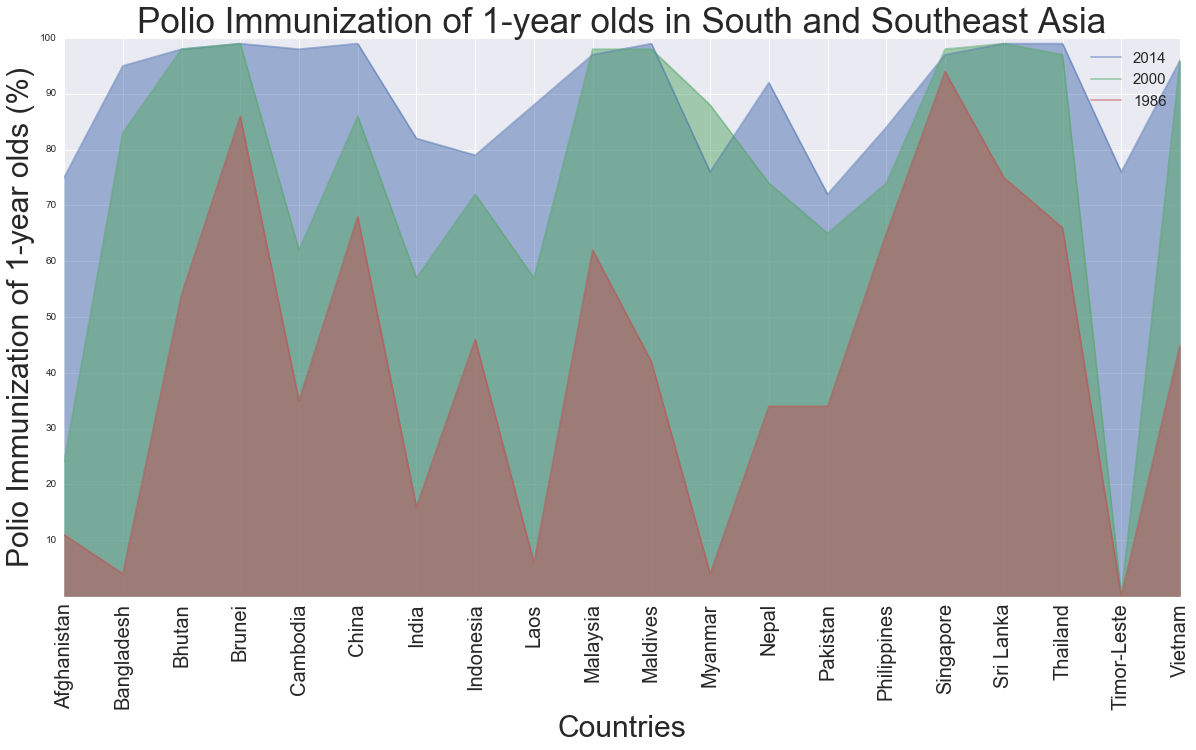

In [40]:
areaPlot = newImmunData.plot.area(stacked=False, figsize=(20,10))
areaPlot.set_xlabel('Countries', fontsize=30)
areaPlot.set_ylabel('Polio Immunization of 1-year olds (%)', fontsize=30)
areaPlot.legend(['2014','2000','1986'], fontsize=15);
areaPlot.set_yticks([10,20,30,40,50,60,70,80,90,100])
areaPlot.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
areaPlot.set_xticklabels(['Afghanistan','Bangladesh','Bhutan','Brunei','Cambodia','China','India','Indonesia','Laos','Malaysia','Maldives','Myanmar','Nepal','Pakistan','Philippines','Singapore','Sri Lanka','Thailand','Timor-Leste','Vietnam'], rotation=90, fontsize=20)
areaPlot.set_title('Polio Immunization of 1-year olds in South and Southeast Asia', fontsize=35 )
areaPlot

In [41]:
#Scatter with new Index?
newDataReset=newImmunData.reset_index()
newDataReset

,index,Country,Polio Immunization of 1-year olds(%) in 2014,Polio Immunization of 1-year olds(%) in 2000,Polio Immunization of 1-year olds(%) in 1986
0,0,Afghanistan,75,24.0,11.0
1,1,Bangladesh,95,83.0,4.0
2,2,Bhutan,98,98.0,54.0
3,3,Brunei Darussalam,99,99.0,86.0
4,4,Cambodia,98,62.0,35.0
5,5,China,99,86.0,68.0
6,6,India,82,57.0,16.0
7,7,Indonesia,79,72.0,46.0
8,8,Lao People's Democratic Republic,88,57.0,6.0
9,9,Malaysia,97,98.0,62.0


[]

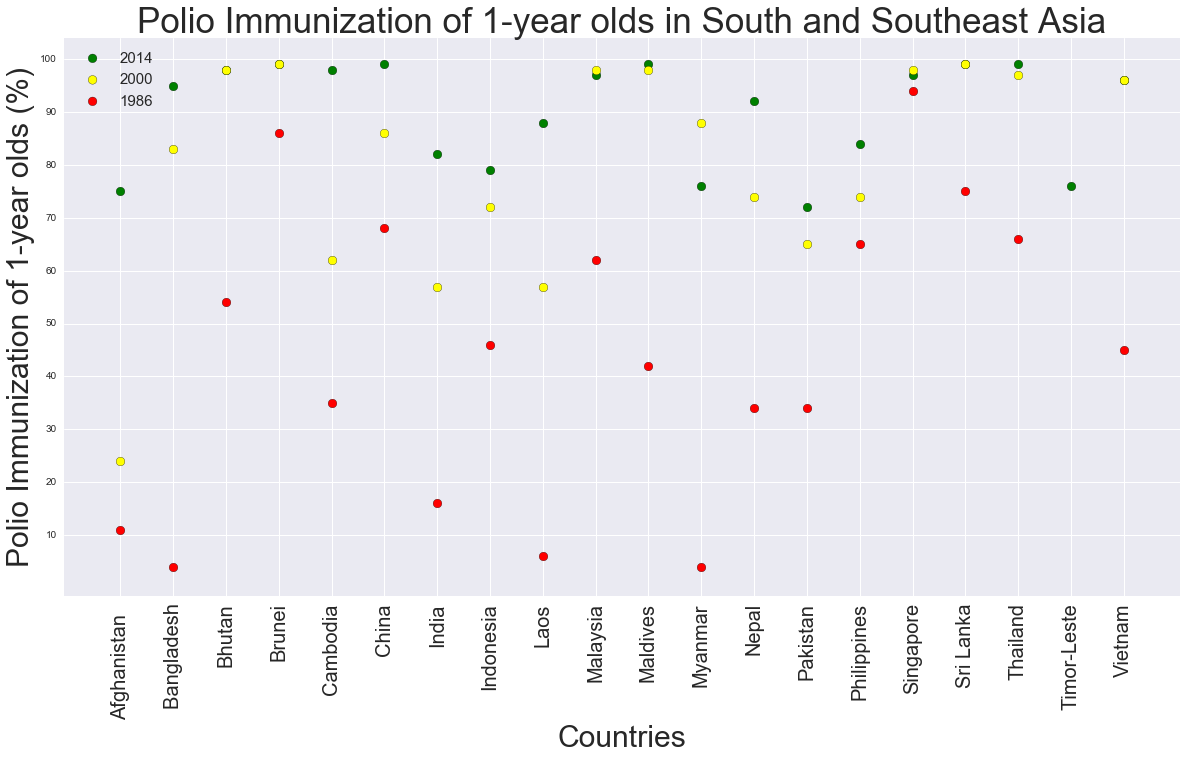

In [42]:
ax = newDataReset.plot(kind ='scatter', x='index', y='Polio Immunization of 1-year olds(%) in 2014', color='Green', label='2014', s=75, figsize=(20,10));
 
newDataReset.plot(kind ='scatter', x='index', y='Polio Immunization of 1-year olds(%) in 2000', color='Yellow', label='2000',ax=ax, s=75, figsize=(20,10));

newSet = newDataReset.plot(kind ='scatter', x='index', y='Polio Immunization of 1-year olds(%) in 1986', color='Red', label='1986',ax=ax, s=75, figsize=(20,10))


newSet.set_xlabel('Countries', fontsize=30)
newSet.set_ylabel('Polio Immunization of 1-year olds (%)',fontsize=30)
newSet.set_yticks([10,20,30,40,50,60,70,80,90,100])
newSet.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
newSet.set_xticklabels(['Afghanistan  ','  Bangladesh','Bhutan','Brunei','Cambodia','China','India','Indonesia','Laos','Malaysia','Maldives','Myanmar','Nepal','Pakistan','Philippines','Singapore','Sri Lanka','Thailand','Timor-Leste','Vietnam'], rotation=90, fontsize=20)
newSet.set_title('Polio Immunization of 1-year olds in South and Southeast Asia', fontsize=35 )
newSet.legend(loc=2, fontsize= 15)
newSet.plot(alpha=2)
 


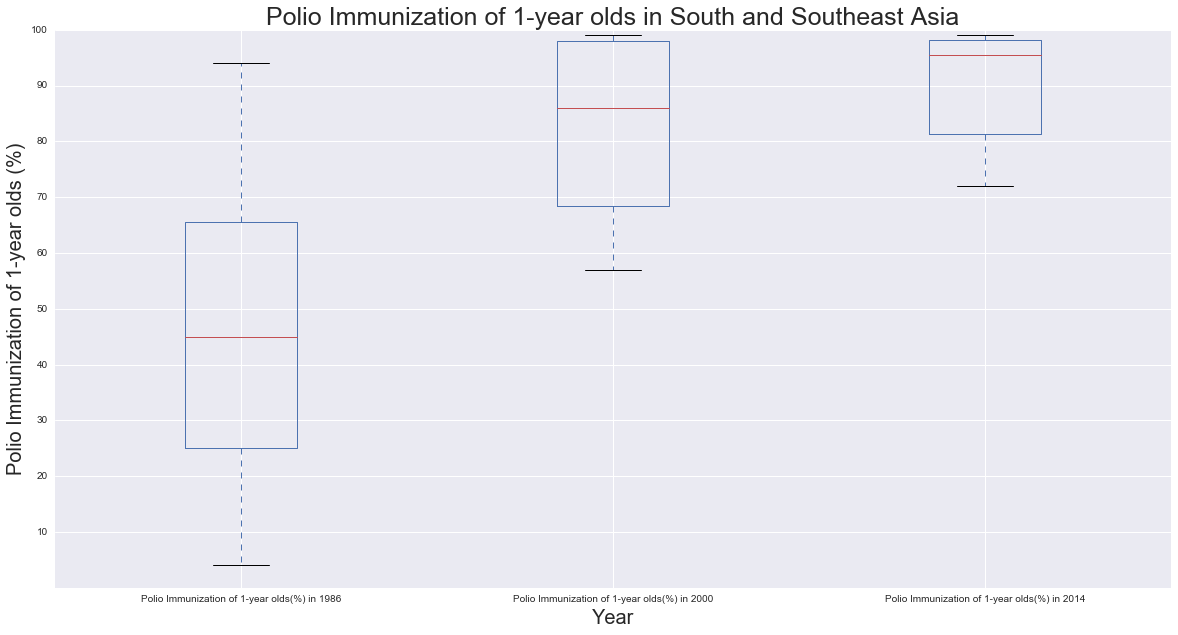

In [43]:
boxPlot = newImmunData[['Polio Immunization of 1-year olds(%) in 1986','Polio Immunization of 1-year olds(%) in 2000','Polio Immunization of 1-year olds(%) in 2014']].plot(grid=True, kind = 'box', figsize=(20,10))
boxPlot.set_ylabel('Polio Immunization of 1-year olds (%)',fontsize=20)
boxPlot.set_xlabel('Year', fontsize=20)
boxPlot.set_yticks([10,20,30,40,50,60,70,80,90,100])
boxPlot.set_title('Polio Immunization of 1-year olds in South and Southeast Asia', fontsize=25 )
boxPlot

### Conclusions

Has the UN initiative as part of the Millenium Development Goals helped to increase coverage of Polio vaccination in children in South and South East Asia? Undoubtably yes. Polio vaccination coverage in South Asia increased 18% from 2000 to 2014. 

Interestingly, the push to eradicate Polio began in the 1980's with a WHO inititive to start eradicating the disease. Cheap vaccines also became more readily available in the developing world at that time. From 1986 to 2000, vaccination coverage in South Asia increased by an impressive 80%. In March 2014, South East Aisa was certified polio free by the WHO. 

While the Millenium Development program certainly made an impact on vaccination coverage, expanding coverage was already a massive trend and probaly would have continued to some degree with or without the MDGs. 

While Polio vaccination both before and during MDG program have been tremendously succesful, Polio continues to be endemic in some parts of the world, specifically in Afghanistan and Pakistan. 



### Sources

http://www.who.int/mediacentre/factsheets/fs114/en/
  
http://www.polioeradication.org/Polioandprevention.aspx